# Cutflow challenge 4.0

**Goal:** Let's do a cutflow challenge using the BDT pairing function from Rachel Hyneman.

In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import uproot
from itertools import product
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt

import os
os.sys.path.append("../RRevolution/code/")
from utils import fileDirSLAC as fileDir, mcToYr, L

# ATLAS style plots!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
physicsSample = 'SMNR'
prodTag = 'JUN20'
mc = 'mc16a'
HC_ordering='scalar_pt'
sort = 'is_DL1r_FixedCutBEff_77'
nSelectedJets = 4
pT_min = 40

ntag = 4

In [3]:
# dat = dd.read_parquet(f'../data/{physicsSample}_{mc}-APR20/df_bdt_3b_btag_sort_RR.parquet')
# apr = dat.compute()

dat = dd.read_parquet(f'../data/{physicsSample}_{mc}-{prodTag}/df_bdt_3b_btag_sort.parquet')
jun = dat.compute()

# To have the bucket notation be consistent w/ Marco's in the NNTs
# apr['bucket'] -= 1
# jun['bucket'] -= 1

/u/ki/nhartman/.local/lib/python3.7/site-packages/pyarrow/compat.py:25: FutureWarning: pyarrow.compat has been deprecated and will be removed in a future release
  "future release", FutureWarning)


In [4]:
dat = dd.read_parquet(f'../data/{physicsSample}_{mc}-{prodTag}/df_bdt_2b_btag_sort.parquet')
jun_2b = dat.compute()

And let's compare against one of the more recent NNTs.

(However, this NNT *doesn't* hae the `run_number > X` cut inside for mc16a)

In [5]:
X = 296939

In [6]:
fname = f'../../public/hh4b/nanoNtuples/marcoOCT20/600043_{mc}/NanoNTuple.root'
f = uproot.open(fname)

In [7]:
fname = f'../../hh4b/nr-hh4b-resolved-reconstruction/sm_mc16a_bdt.root'
f_nr = uproot.open(fname)

In [8]:
fname = f'../../hh4b/res-hh4b-resolved-reconstruction/sm_mc16a_bdt.root'
f_res = uproot.open(fname)

In [9]:
for k in f.keys():
    print(k)

b'everything;2'
b'fullmassplane;1'
b'sig;1'
b'validation;1'
b'control;1'
b'TwoTagCutflow;1'
b'FourTagCutflow;1'


## Cutflow check

In [10]:
h_4b = f[b'FourTagCutflow;1']
h_2b = f[b'TwoTagCutflow;1']
cutflow_RR = pd.DataFrame(np.column_stack([h_4b.values,h_2b.values]),
                          index=h_4b.xlabels,columns=['4b','2b'])

In [11]:
cutflow_RR

4b            2b
Initial                   26760.097015  26760.097015
Selected                  26760.097015  26760.097015
NTuple                        6.825142      6.825142
Trigger                       3.697503      3.697503
4 good jets, >= 2 tagged      2.923291      2.923291
Multi Tagged                  0.714581      0.812019
Valid                         0.714581      0.812019
Trigger Buckets               0.661523      0.716840
dEta_hh                       0.546382      0.521081
Muon LepTop                   0.000200      0.000239
Electron LepTop               0.000366      0.000370
HadTop                        0.029492      0.023031
Main Xwt                      0.453765      0.444052
Signal                        0.234504      0.071269
Validation                    0.115438      0.052301
Control                       0.051274      0.053685

In [12]:
cutflow_RR.loc['Trigger Buckets','4b'] / cutflow_RR.loc['Valid','4b']

0.9257489217556317

In [14]:
h_4b = f_nr[b'FourTagCutflow;1']
h_2b = f_nr[b'TwoTagCutflow;1']
cutflow_nr = pd.DataFrame(np.column_stack([h_4b.values,h_2b.values]),
                          index=h_4b.xlabels,columns=['4b','2b'])

In [15]:
0.843124 / 1.13

0.7461274336283187

In [16]:
cutflow_nr #* (L[16] / (L[15]+L[16]))

4b            2b
Initial                   26760.097015  26760.097015
Selected                  26760.097015  26760.097015
NTuple                        7.829593      7.829593
Trigger                       4.410929      4.410929
4 good jets, >= 2 tagged      3.491242      3.491242
Multi Tagged                  0.843124      0.979654
Valid                         0.843124      0.979654
Trigger Buckets               0.795607      0.881434
dEta_hh                       0.656427      0.640580
Main Xwt                      0.544418      0.545560
Signal                        0.279814      0.087448
Validation                    0.138875      0.064727
Control                       0.062293      0.066149

In [17]:
h_4b = f_res[b'FourTagCutflow;1']
h_2b = f_res[b'TwoTagCutflow;1']
cutflow_res = pd.DataFrame(np.column_stack([h_4b.values,h_2b.values]),
                           index=h_4b.xlabels,columns=['4b','2b'])

In [18]:
cutflow_res

4b            2b
Initial                   26760.097015  26760.097015
Selected                  26760.097015  26760.097015
NTuple                        7.829590      7.829590
Trigger                       4.410930      4.410930
4 good jets, >= 2 tagged      3.491243      3.491243
Multi Tagged                  0.843125      0.979654
Valid                         0.843125      0.979654
Trigger Buckets               0.795611      0.881434
dEta_hh                       0.656421      0.640580
Muon LepTop                   0.000234      0.000301
Electron LepTop               0.000444      0.000449
HadTop                        0.035615      0.028308
Main Xwt                      0.544415      0.545560
Signal                        0.279825      0.087448
Validation                    0.138894      0.064727
Control                       0.062294      0.066149

Interesting that this comparison over everything

In [19]:
ev_nr = f_nr['everything'].pandas.df()

In [20]:
ev_nr.loc[(ev_nr.ntag >= 4),'mc_sf'].sum()

0.79560703

In [21]:
np.sum(ev_nr.ntag >= 4)

62961

In [22]:
# for c in everything:
#     print(c)

In [23]:
np.unique(ev_nr.trig_sf),np.unique(ev_nr.jet_trig_sfs)

(array([1.]), array([1.]))

In [24]:
np.unique(ev_res.trig_sf),np.unique(ev_res.jet_trig_sfs)

NameError: name 'ev_res' is not defined

In [ ]:
ev_res = f_res['everything'].pandas.df()

In [ ]:
for c in ev_res:
    print(c)

In [ ]:
jun.loc[(jun.ntag >=4) & (jun.bucket!=-1),'mc_sf'].sum() / L[16] * 1.13

In [ ]:
apr.loc[(apr.ntag >=4) & (apr.bucket!=-1),'mc_sf'].sum() / L[16]

In [ ]:
everything[(everything.ntag >=4) & (everything.run_number > X)].head()

In [ ]:
jun.head()

In [ ]:
jun[jun.event_number==286268] 

In [ ]:
apr[apr.event_number==286268] 

In [ ]:
0.000010*L[16]

In [ ]:
ni, ri = 100, (-.001,.001)
plt.hist(jun.loc[(jun.ntag >=4) & (jun.bucket!=-1),'mc_sf'],ni,ri,histtype='step',label='RRevolution')
plt.hist(everything.loc[(everything.ntag >=4) & (everything.run_number > X),'mc_sf']*L[16],
         ni,ri,histtype='step',label='resolved-recon')

plt.xlabel('mc_sf')
plt.ylabel('unweighted entries')
plt.legend(loc='upper left')
plt.show()

In [ ]:
(L[15]+L[16])/L[16]

In [ ]:
k_factor = 1.11354

In [25]:
ni, ri = 100, (-.00002,.00002)
#plt.hist(jun.loc[(jun.ntag >=4) & (jun.bucket!=-1),'mc_sf'],ni,ri,histtype='step',label='RRevolution')
plt.hist(everything.loc[(everything.ntag >=4) & (everything.run_number > X),'mc_sf']*1.13*1.11354,
         ni,ri,histtype='step',label='Marco NNT')
plt.hist(ev_nr.loc[(ev_nr.ntag >=4),'mc_sf'], ni,ri,histtype='step',label='non-resonant')
plt.hist(ev_res.loc[(ev_res.ntag >=4),'mc_sf'], ni,ri,histtype='step',label='master')


plt.xlabel('mc_sf')
plt.ylabel('unweighted entries')
plt.legend(loc='upper left')
plt.show()

NameError: name 'everything' is not defined

In [26]:
everything.loc[(everything.ntag >=4) & (everything.run_number > X),'event_number']

NameError: name 'everything' is not defined

In [27]:
ev_nr.loc[ev_nr.ntag >=4, 'event_number']

entry   subentry
1       0           508288
2       0           507693
3       0           507425
4       0           507024
5       0           507089
                     ...  
161382  0           908255
161385  0           909598
161386  0           909891
161387  0           908192
161388  0           908082
Name: event_number, Length: 62961, dtype: int64

In [28]:
i_mco = np.argsort(everything.loc[(everything.ntag >=4) & (everything.run_number>X), 'event_number'].values)
i_nr  = np.argsort(ev_nr.loc[ev_nr.ntag >=4, 'event_number'].values)
i_res = np.argsort(ev_res.loc[ev_res.ntag >=4, 'event_number'].values)

NameError: name 'everything' is not defined

In [29]:
everything.loc[(everything.ntag >=4) & (everything.run_number>X), 'mc_sf'].values[i_mco] * k_factor / 0.8849

NameError: name 'everything' is not defined

In [30]:
ev_nr.loc[ev_nr.ntag >=4, 'mc_sf'].values[i_nr]

NameError: name 'i_nr' is not defined

In [31]:
ev_res.loc[ev_res.ntag >=4, 'mc_sf'].values[i_res]

NameError: name 'ev_res' is not defined

In [32]:
0.0279 * 0.3392 *1.1129

0.010532129472000001

In [33]:
0.00945825 * 1 * 1.11354

0.010532139704999999

In [34]:
np.sum((everything.ntag >=4) & (everything.run_number > X))

NameError: name 'everything' is not defined

In [35]:
np.sum(ev_nr.ntag >=4), np.sum(ev_res.ntag >=4)

NameError: name 'ev_res' is not defined

In [36]:
1/0.8849

1.1300711944852526

In [37]:
np.sum(everything.loc[(everything.ntag >=4) & (everything.run_number > X),'mc_sf'])*1.13*k_factor

NameError: name 'everything' is not defined

In [38]:
np.sum(ev_nr.loc[(ev_nr.ntag >=4),'mc_sf'])

0.79560703

Alright, so this means for (this version of) the NNTs, the "Multi Tagged" cut means 4b for the FourTagCutflow (which makes sense).




### Check trigger buckets

Just for this section I can x-check against Marco's NNTs since he has the `bucket` variable inside :-)

In [51]:
mc

'mc16a'

In [39]:
fname = f'../../public/hh4b/nanoNtuples/marcoOCT20/600043_{mc}/NanoNTuple.root'
f_marco = uproot.open(fname)

pT_cols = [f'pT_h{i}_j{j}' for i,j in product([1,2],[1,2])]
everything = f_marco['everything'].pandas.df(branches=['ntag','run_number','trig_bucket']+pT_cols)

In [40]:
emask = (everything.ntag>=4) & (everything.run_number>X)
idx, counts = np.unique(everything.loc[emask,'trig_bucket'],return_counts=True)
counts

array([ 1739,  2466,  1052, 57704])

In [41]:
np.unique(jun.loc[jun.ntag>=4,'bucket'],return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 3891,  1739,  2466,  1052, 57704]))

Cool! So in terms of *unweighted* counts, they're matching up. Let's sanity check the distributions tho.

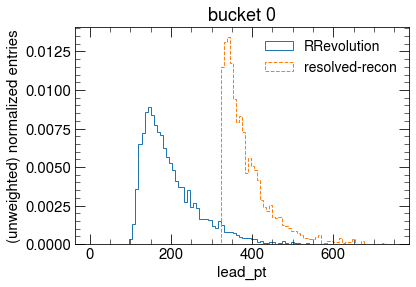

In [42]:
nBins = 100
plt.hist(jun.loc[(jun.bucket==0)&(jun.ntag>=4),'lead_pt'],nBins,(0,750),histtype='step',density=True,label='RRevolution')

pT_cols = [f'pT_h{i}_j{j}' for i,j in product([1,2],[1,2])]
lead_pt = np.max(everything.loc[(everything.trig_bucket==0) & emask,pT_cols].values, axis=1)
plt.hist(lead_pt, nBins,(0,750),histtype='step',density=True,ls='--',label='resolved-recon')
plt.xlabel('lead_pt')
plt.ylabel('(unweighted) normalized entries')
plt.title('bucket 0')
plt.legend()
plt.show()

Yey!!!!!! In terms of the trig_bucket in the `everything` tree: they match!! <3

Bucket 0 is ths only one that I can visualize this way since it's the only variable that I can infer from what RR is saving.

In [43]:
plt.hist(jun.loc[jun.bucket==2,'HT_all'],100,(0,1500),histtype='step',label='2b+$H_T$')
plt.hist(jun.loc[jun.bucket==3,'HT_all'],100,(0,1500),histtype='step',label='2b2j')
plt.title('RRevolution')
plt.xlabel('HT_all')
plt.ylabel('unweighted entries')
plt.legend()
plt.show()

# Compare distributions

### Just after pairing

Some variables sensitive to the BDT implementation being correct are the BDT_chosenPairingScore and the reconstructed masses.


Yey - since the HC mass distributions match - the pairing's probably ok too, but I should *check* this explicitly as well.

KeyError: 'pairing_score_1'

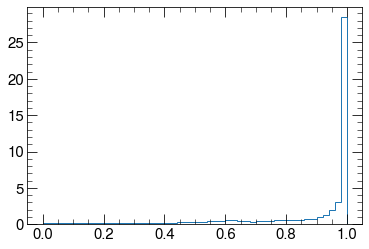

In [44]:
plt.hist(jun.loc[(jun.bucket!=-1) & (jun.ntag >= 4),'BDT_chosenPairingScore'],50,(0,1),histtype='step',density=True)

emask = (everything.ntag>=4) & (everything.run_number>296939)
plt.hist(everything.loc[emask,'pairing_score_1'], 50,(0,1),histtype='step',density=True,ls='--')
plt.xlabel('BDT_chosenPairingScore')
plt.title('after bucketting')
plt.show()

In [45]:
for c in ['m_h1','m_h2']:

    plt.figure()
    plt.hist(jun.loc[(jun.bucket!=-1) & (jun.ntag >= 4),c],50,(0,250),histtype='step',density=True)

    plt.hist(everything.loc[emask,c], 50,(0,250),histtype='step',density=True,ls='--')
    plt.xlabel(c)
    plt.title('after bucketting')
    plt.show()

KeyError: 'm_h1'

### $\Delta \eta_{hh}$

Cool - next, let's check the $|\Delta \eta_{hh}|$ cut.

In [46]:
sum(abs(everything.loc[emask,'eta_h1']-everything.loc[emask,'eta_h2'])<1.5)

KeyError: 'eta_h1'

In [47]:
sum(abs(df.loc[df.bucket!=-1,'eta_h1']-df.loc[df.bucket!=-1,'eta_h2'])<1.5)

NameError: name 'df' is not defined

In [48]:
np.sum((everything.ntag>=4)&(abs(everything.eta_h1 - everything.eta_h2)<1.5) & (everything.run_number>296939))

AttributeError: 'DataFrame' object has no attribute 'eta_h1'

In [49]:
np.sum((np.abs(df.eta_h1 - df.eta_h2)<1.5) & (df.bucket!= -1))

NameError: name 'df' is not defined

In [50]:
df.njets.min()

NameError: name 'df' is not defined

In [ ]:
df.head()

### $X_{wt}$

Sean discovered ([update](https://indico.cern.ch/event/994939/contributions/4182687/attachments/2171695/3666568/Reweighting%20and%20Xwt.pdf)) that I had messed up the $X_{wt}$ definition for ... 

In [ ]:
for c in ev_nr:
    print(c)

In [ ]:
ev_nr[['X_wt_tag','X_wt_notag','X_wt_nonHCWjets','ntag']]

In [ ]:
ev_nr.loc[(ev_nr.X_wt_tag != ev_nr.X_wt_notag),['X_wt_tag','X_wt_notag','X_wt_nonHCWjets','ntag']]

In [ ]:
ni, ri = 100,(0,15)
plt.hist(ev_nr.loc[ev_nr.ntag >= 4,'X_wt_tag'],ni,ri,histtype='step',label='RR: X_wt_tag',
         weights=ev_nr.loc[(ev_nr.ntag >= 4),'mc_sf']*L[16],color='lightskyblue',lw=2)
plt.hist(ev_nr.loc[ev_nr.ntag >= 4,'X_wt_notag'],ni,ri,histtype='step',label='RR: X_wt_notag',
         weights=ev_nr.loc[ev_nr.ntag >= 4,'mc_sf']*L[16],color='lavender',lw=2)

jun_mask = (jun.ntag >= 4)&(jun.bucket!=0)
plt.hist(jun.loc[jun_mask,'X_wt'],ni,ri,histtype='step',label='me: X_wt',
         weights=jun.loc[jun_mask,'mc_sf'],color='deeppink',ls='--')
plt.hist(jun.loc[jun_mask,'X_wt_old'],ni,ri,histtype='step',label='me: X_wt_old',
         weights=jun.loc[jun_mask,'mc_sf'],color='darkorange',ls='--')

plt.xlabel('$X_{wt}$',fontsize=20)
plt.ylabel('Entries')
plt.legend(fontsize=16)
plt.title('4b bdt, '+mc)
plt.show()


In [ ]:
ni, ri = 100,(0,15)
m_nr = (ev_nr.ntag >= 4)&(abs(ev_nr.eta_h1-ev_nr.eta_h2)<1.5)
plt.hist(ev_nr.loc[m_nr,'X_wt_tag'],ni,ri,histtype='step',label='RR: X_wt_tag',
         weights=ev_nr.loc[m_nr,'mc_sf']*L[16],color='lightskyblue',lw=2)
plt.hist(ev_nr.loc[m_nr,'X_wt_notag'],ni,ri,histtype='step',label='RR: X_wt_notag',
         weights=ev_nr.loc[m_nr,'mc_sf']*L[16],color='lavender',lw=2)

jun_mask = (jun.ntag >= 4)&(jun.bucket!=0)&(jun.abs_deta_hh<1.5)
plt.hist(jun.loc[jun_mask,'X_wt'],ni,ri,histtype='step',label='me: X_wt',
         weights=jun.loc[jun_mask,'mc_sf'],color='deeppink',ls='--')
plt.hist(jun.loc[jun_mask,'X_wt_old'],ni,ri,histtype='step',label='me: X_wt_old',
         weights=jun.loc[jun_mask,'mc_sf'],color='darkorange',ls='--')

plt.xlabel('$X_{wt}$',fontsize=20)
plt.ylabel('Entries')
plt.legend(fontsize=16)
plt.title('4b bdt, '+mc+': $|\Delta \eta_{hh}| < 1.5$')
plt.show()

print('RR')
print(np.sum(ev_nr.loc[m_nr,'X_wt_tag'] > 1.5))
print(np.sum(ev_nr.loc[m_nr,'X_wt_tag'] > 1.5))
print('my fw')
print(np.sum(jun.loc[jun_mask,'X_wt'] > 1.5))
print(np.sum(jun.loc[jun_mask,'X_wt_old'] > 1.5))

Next: on 2b!!

In [ ]:
ni, ri = 100,(0,15)
m_nr = (ev_nr.ntag == 2)&(abs(ev_nr.eta_h1-ev_nr.eta_h2)<1.5)
plt.hist(ev_nr.loc[m_nr,'X_wt_tag'],ni,ri,histtype='step',label='RR: X_wt_tag',
         weights=ev_nr.loc[m_nr,'mc_sf']*L[16],color='lightskyblue',lw=2)
plt.hist(ev_nr.loc[m_nr,'X_wt_notag'],ni,ri,histtype='step',label='RR: X_wt_notag',
         weights=ev_nr.loc[m_nr,'mc_sf']*L[16],color='lavender',lw=2)

jun_mask = (jun_2b.ntag == 2)&(jun_2b.bucket!=0)&(jun_2b.abs_deta_hh<1.5)
plt.hist(jun_2b.loc[jun_mask,'X_wt'],ni,ri,histtype='step',label='me: X_wt',
         weights=jun_2b.loc[jun_mask,'mc_sf'],color='deeppink',ls='--')
plt.hist(jun_2b.loc[jun_mask,'X_wt_old'],ni,ri,histtype='step',label='me: X_wt_old',
         weights=jun_2b.loc[jun_mask,'mc_sf'],color='darkorange',ls='--')

plt.xlabel('$X_{wt}$',fontsize=20)
plt.ylabel('Entries')
plt.legend(fontsize=16)
plt.title('2b bdt, '+mc+': $|\Delta \eta_{hh}| < 1.5$')
plt.show()

print('RR')
print(np.sum(ev_nr.loc[m_nr,'X_wt_tag'] > 1.5))
print(np.sum(ev_nr.loc[m_nr,'X_wt_notag'] > 1.5))
print('my fw')
print(np.sum(jun_2b.loc[jun_mask,'X_wt'] > 1.5))
print(np.sum(jun_2b.loc[jun_mask,'X_wt_old'] > 1.5))

Awesome, the definitions are making *a ton* of sense (and agreeing w/ Sean's talk) for 2b, except I think my definition of X_wt_old is *fucked*.

In [ ]:
np.sum(ev_nr.ntag >= 4)

In [ ]:
np.sum((jun.ntag >= 4))

### Region definitions